In [9]:
from pathlib import Path
from IPython.display import display, Markdown
import os
import Visualize as VS
import matplotlib.pyplot as plt

cwd= Path.cwd()

In [17]:
# Open and read mixed mesh
# ../data/testMeshPatterns/essenceModels/mixedModel.essence
relative_path = os.path.join(cwd, "..", "data", "testMeshPatterns", "essenceModels", "mixedModel.essence")

with open(relative_path, "r") as file:
    content = file.read()
    # print(content)
markdownFile = "**Mixed Model**\n```" + content + "```"
display(Markdown(markdownFile))

**Mixed Model**
```$ This of mixed patterns to avoid
$ mesh_avoidance = permutation + mesh pieces + vincular/bivincular indices
given mixed_avoidance : set of (sequence(injective) of int, relation of (int * int), set of int)

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh, bars) in mixed_avoidance .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            $ Mesh pieces
            (
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            ) \/
            $ Vincular pieces
            !(forAll bar in bars . ix[bar] + 1 = ix[bar+1])
```

In [11]:
# Open and read mixed mesh param file
# ../data/testMeshPatterns/meshParams/vinc_mesh_132_index_1.param 
relative_path = os.path.join(cwd, "..", "data", "testMeshPatterns", "meshParams", "mixed_132.param")

with open(relative_path, "r") as file:
    content = file.read()
    # print(content)
markdownFile = "```" + content + "```"
display(Markdown(markdownFile))

```$ mesh param file

$ mesh_avoidance = permutation + mesh pieces + vincular indeces
letting mixed_avoidance be { ( sequence(1,3,2), relation( (2, 1) ), {1} ) } 
letting length be 4

$ n Solution for avoidance should be:
$ Avoiding pattern
$ test

$ Contains pattern but breaks mesh
$ test
```

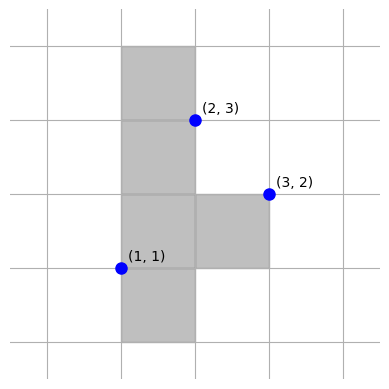

[(1, 0), (1, 1), (1, 2), (1, 3)]


In [12]:
shaded_points = VS.vincularMesh(1,4) + [(2,1)]
VS.visualize([1,3,2], shaded_points)
print(VS.vincularMesh(1,4))

**Parameter file**

In the original model, picture above would be generated with input: 

```
letting mesh_avoidance be { ( sequence(1,3,2), relation( (2, 1), (1, 0), (1, 1), (1, 2), (1, 3) ) ) } 
```

In [13]:
%%bash
./runConjure.sh mixedModel.essence mixed_132.param > /dev/null 2>&1

In [14]:
def readSolutions():
    # Open the solution file and print its contents
    with open("solutions", "r") as solutions:
        contents = solutions.read()
    # markdownFile = "```" + contents + "```"
    # display(Markdown(markdownFile))

    # Split the contents by the "language Essence" line to separate solutions
    solution_blocks = contents.split("language Essence 1.3\n")

    # Initialize a list to store the extracted sequences
    sequences = []

    # Iterate through each solution block
    for solution_block in solution_blocks:
        # Skip empty blocks
        if solution_block.strip():
            # Find the line containing "letting perm be sequence" and extract the sequence
            sequence_line = [line for line in solution_block.splitlines() if "letting perm be sequence" in line]
            if sequence_line:
                sequence = sequence_line[0].split("sequence(")[1].split(")")[0]
                sequence_list = [int(item) for item in sequence.split(", ")]
                sequences.append(sequence_list)
                
    sequences = sorted(sequences)

    # Print the extracted sequences
    for sequence in sequences:
        print("Extracted sequence:", sequence)
    print("\nNumber of sequences is: " + str(len(sequences)))

readSolutions()

Extracted sequence: [1, 2, 3, 4]
Extracted sequence: [2, 1, 3, 4]
Extracted sequence: [2, 3, 1, 4]
Extracted sequence: [2, 3, 4, 1]
Extracted sequence: [3, 1, 2, 4]
Extracted sequence: [3, 2, 1, 4]
Extracted sequence: [3, 2, 4, 1]
Extracted sequence: [3, 4, 1, 2]
Extracted sequence: [3, 4, 2, 1]
Extracted sequence: [4, 1, 2, 3]
Extracted sequence: [4, 2, 1, 3]
Extracted sequence: [4, 2, 3, 1]
Extracted sequence: [4, 3, 1, 2]
Extracted sequence: [4, 3, 2, 1]

Number of sequences is: 14


In [15]:
%%bash
./runConjure.sh mesh_avoidance.essence mesh_132.param > /dev/null 2>&1

In [16]:
readSolutions()

Extracted sequence: [1, 2, 3, 4]
Extracted sequence: [2, 1, 3, 4]
Extracted sequence: [2, 3, 1, 4]
Extracted sequence: [2, 3, 4, 1]
Extracted sequence: [3, 1, 2, 4]
Extracted sequence: [3, 2, 1, 4]
Extracted sequence: [3, 2, 4, 1]
Extracted sequence: [3, 4, 1, 2]
Extracted sequence: [3, 4, 2, 1]
Extracted sequence: [4, 1, 2, 3]
Extracted sequence: [4, 2, 1, 3]
Extracted sequence: [4, 2, 3, 1]
Extracted sequence: [4, 3, 1, 2]
Extracted sequence: [4, 3, 2, 1]

Number of sequences is: 14


**To Do**

1. Test the data
2. Function to decompose the model